#### Transformations

In [1]:
import os

import torchvision
from segwork.data import ColorMasktoIndexMask, IndexMasktoColorMask, generate_numpy_files, DroneDataset

In [2]:
DATA_DIR = os.path.join('data')
# Instantiate dataset
dataset = DroneDataset( 
    root = os.path.join(DATA_DIR, 'semantic_drone_dataset'),
    pil_target=True,               # Target: numpy.ndarray
)

In [11]:
# Hard process, it takes on avg 10s
_, label = dataset[0]
transform = torchvision.transforms.Compose([
    torchvision.transforms.transforms.PILToTensor(),
    ColorMasktoIndexMask(colors=dataset.mask_colors_index)
])
index_mask = transform(label)
index_mask.size()

torch.Size([4000, 6000])

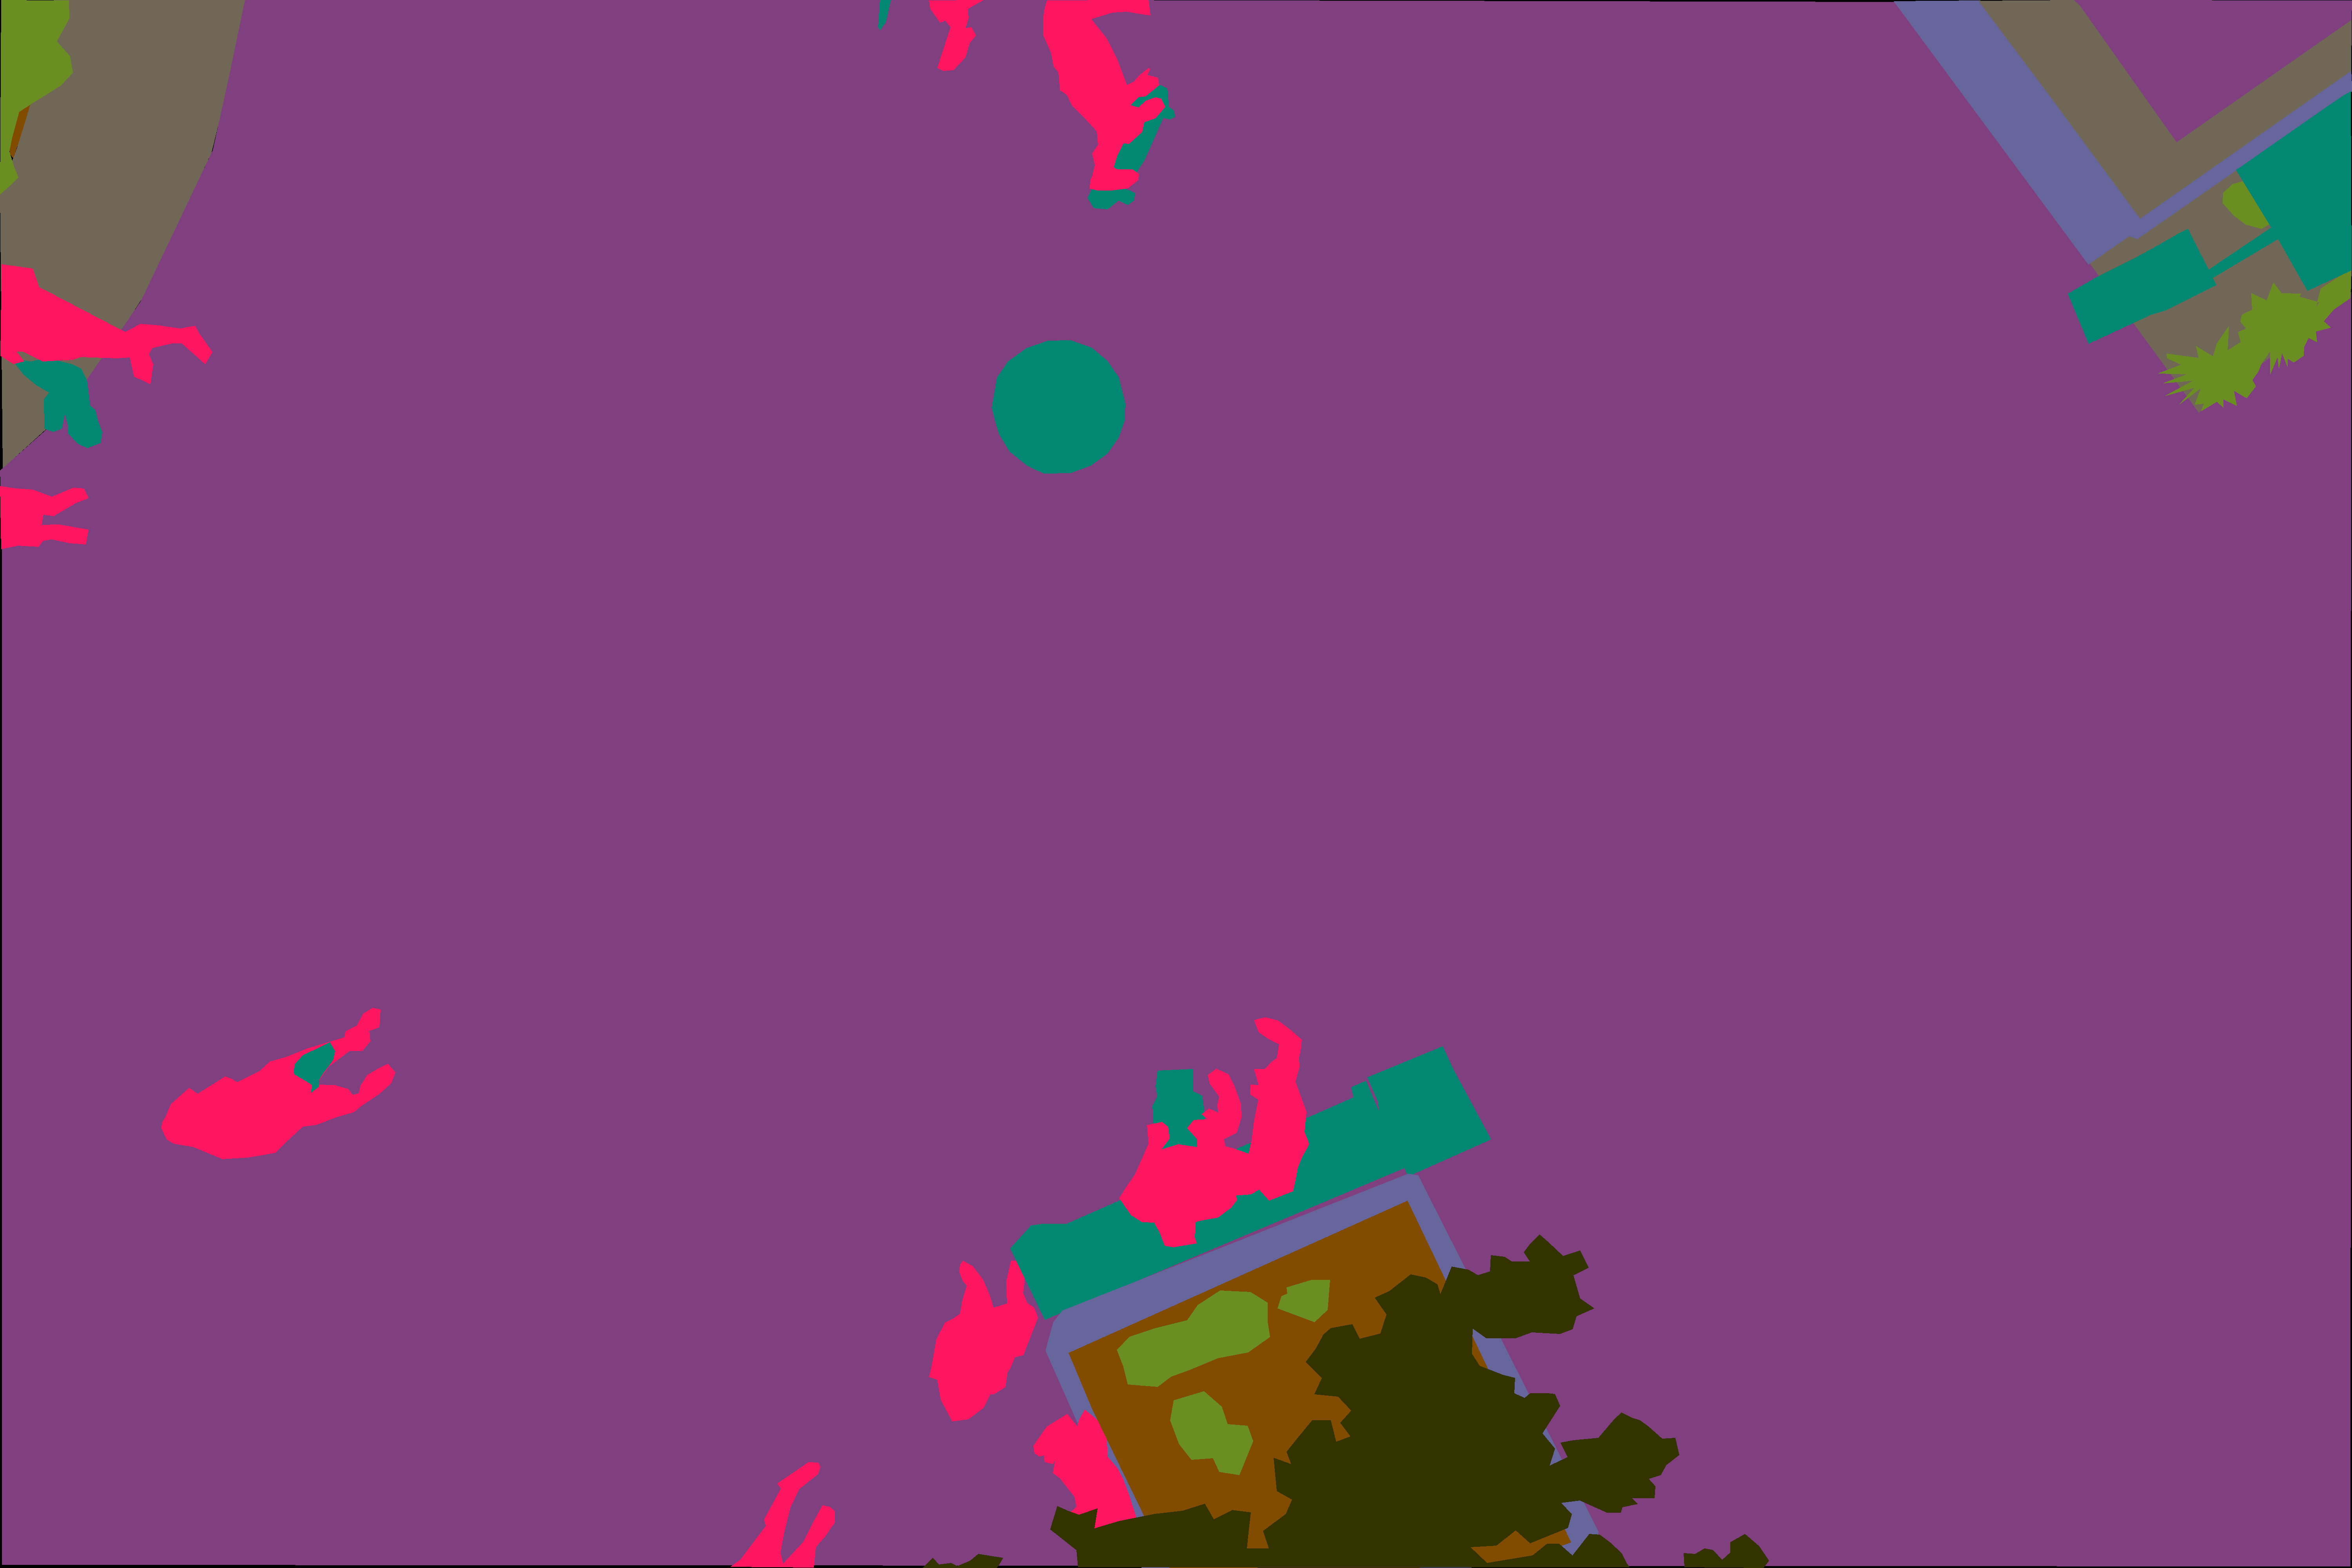

In [14]:
reverse_transform = torchvision.transforms.Compose([
    IndexMasktoColorMask(colors=dataset.mask_colors_index),
    torchvision.transforms.ToPILImage()
])

color_mask = reverse_transform(index_mask)
color_mask

### Generate numpy masks

In [3]:
generate_numpy_files(
    path = dataset.TRAINING_SEMANTICS,
    dataset = dataset,
    color_map = dataset.mask_colors_index
)

100%|██████████| 400/400 [1:01:12<00:00,  9.18s/it]
